### Load libraries

In [1]:
import gnssvod as gv
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import matplotlib.dates as mdates

### Load data

Open the dataset you want to plot SNR. Do it by period, so it can be visualized dry season versus wet season. Do separate folders for each forest cover

In [2]:
# load dry season data
dry_season_swimac = xr.open_mfdataset('/Users/vargasgg/Library/CloudStorage/Box-Box/Project_HorizontesGNSS/Data/nc_files/SWIMAC/DrySeason/*.nc',combine='nested',concat_dim='Epoch')
dry_season_pacqui = xr.open_mfdataset('/Users/vargasgg/Library/CloudStorage/Box-Box/Project_HorizontesGNSS/Data/nc_files/PACQUI/DrySeason/*.nc',combine='nested',concat_dim='Epoch')
dry_season_manchi = xr.open_mfdataset('/Users/vargasgg/Library/CloudStorage/Box-Box/Project_HorizontesGNSS/Data/nc_files/MANCHI/DrySeason/*.nc',combine='nested',concat_dim='Epoch')

# load wet season data
wet_season_swimac = xr.open_mfdataset('/Users/vargasgg/Library/CloudStorage/Box-Box/Project_HorizontesGNSS/Data/nc_files/SWIMAC/WetSeason/*.nc',combine='nested',concat_dim='Epoch')
wet_season_pacqui = xr.open_mfdataset('/Users/vargasgg/Library/CloudStorage/Box-Box/Project_HorizontesGNSS/Data/nc_files/PACQUI/WetSeason/*.nc',combine='nested',concat_dim='Epoch')
wet_season_manchi = xr.open_mfdataset('/Users/vargasgg/Library/CloudStorage/Box-Box/Project_HorizontesGNSS/Data/nc_files/MANCHI/WetSeason/*.nc',combine='nested',concat_dim='Epoch')

/var/folders/05/mycn0lrx46d_t3st_g0xv1lh0000gq/T/ipykernel_13545/1417871096.py:2: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'SV' ('SV',) The recommendation is to set join explicitly for this case.
  dry_season_swimac = xr.open_mfdataset('/Users/vargasgg/Library/CloudStorage/Box-Box/Project_HorizontesGNSS/Data/nc_files/SWIMAC/DrySeason/*.nc',combine='nested',concat_dim='Epoch')
/var/folders/05/mycn0lrx46d_t3st_g0xv1lh0000gq/T/ipykernel_13545/1417871096.py:3: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'SV' (

### Build data frame

Convert the xarray.DataSet to a pandas.DataFrame for further processing. We will also subset each data frame

In [3]:
# swimac DataFrames
df_DS_swimac = dry_season_swimac.to_dataframe().dropna(how='all').reorder_levels(["Epoch","SV"]).sort_index()
df_DS_swimac.xs('E03',level='SV') #to only include SV E03

df_WS_swimac = wet_season_swimac.to_dataframe().dropna(how='all').reorder_levels(["Epoch","SV"]).sort_index()
df_WS_swimac.xs('E03',level='SV') #to only include SV E03

# pacqui DataFrames
df_DS_pacqui = dry_season_pacqui.to_dataframe().dropna(how='all').reorder_levels(["Epoch","SV"]).sort_index()
df_DS_pacqui.xs('E03',level='SV') #to only include SV E03

df_WS_pacqui = wet_season_pacqui.to_dataframe().dropna(how='all').reorder_levels(["Epoch","SV"]).sort_index()
df_WS_pacqui.xs('E03',level='SV') #to only include SV E03

# manchi DataFrames
df_DS_manchi = dry_season_manchi.to_dataframe().dropna(how='all').reorder_levels(["Epoch","SV"]).sort_index()
df_DS_manchi.xs('E03',level='SV') #to only include SV E03

df_WS_manchi = wet_season_manchi.to_dataframe().dropna(how='all').reorder_levels(["Epoch","SV"]).sort_index()
df_WS_manchi.xs('E03',level='SV') #to only include SV E03

S1C   S1X  S2C  S2I  S2X  S7I   S7X  Azimuth  Elevation
Epoch                                                                       
2025-08-12 13:34:30  NaN  32.0  NaN  NaN  NaN  NaN  24.0   -178.4       31.2
2025-08-12 13:35:00  NaN  34.0  NaN  NaN  NaN  NaN  25.0   -178.4       31.4
2025-08-12 13:35:30  NaN  32.0  NaN  NaN  NaN  NaN  25.0   -178.5       31.6
2025-08-12 13:36:00  NaN  27.0  NaN  NaN  NaN  NaN  23.0   -178.6       31.7
2025-08-12 13:36:30  NaN  26.0  NaN  NaN  NaN  NaN  26.0   -178.6       31.9
...                  ...   ...  ...  ...  ...  ...   ...      ...        ...
2025-08-22 13:32:00  NaN  39.0  NaN  NaN  NaN  NaN  27.0    177.4       45.1
2025-08-22 13:32:30  NaN  38.0  NaN  NaN  NaN  NaN  25.0    177.3       45.3
2025-08-22 13:33:00  NaN  38.0  NaN  NaN  NaN  NaN  22.0    177.3       45.4
2025-08-22 13:33:30  NaN  37.0  NaN  NaN  NaN  NaN  21.0    177.2       45.6
2025-08-22 13:34:00  NaN  36.0  NaN  NaN  NaN  NaN  21.0    177.2       45.8

[8249 rows x 9 columns]

## Single satellite visual

Visualize one single satellite for both dry and wet season in a figure with two plots

/var/folders/05/mycn0lrx46d_t3st_g0xv1lh0000gq/T/ipykernel_13545/1635700170.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


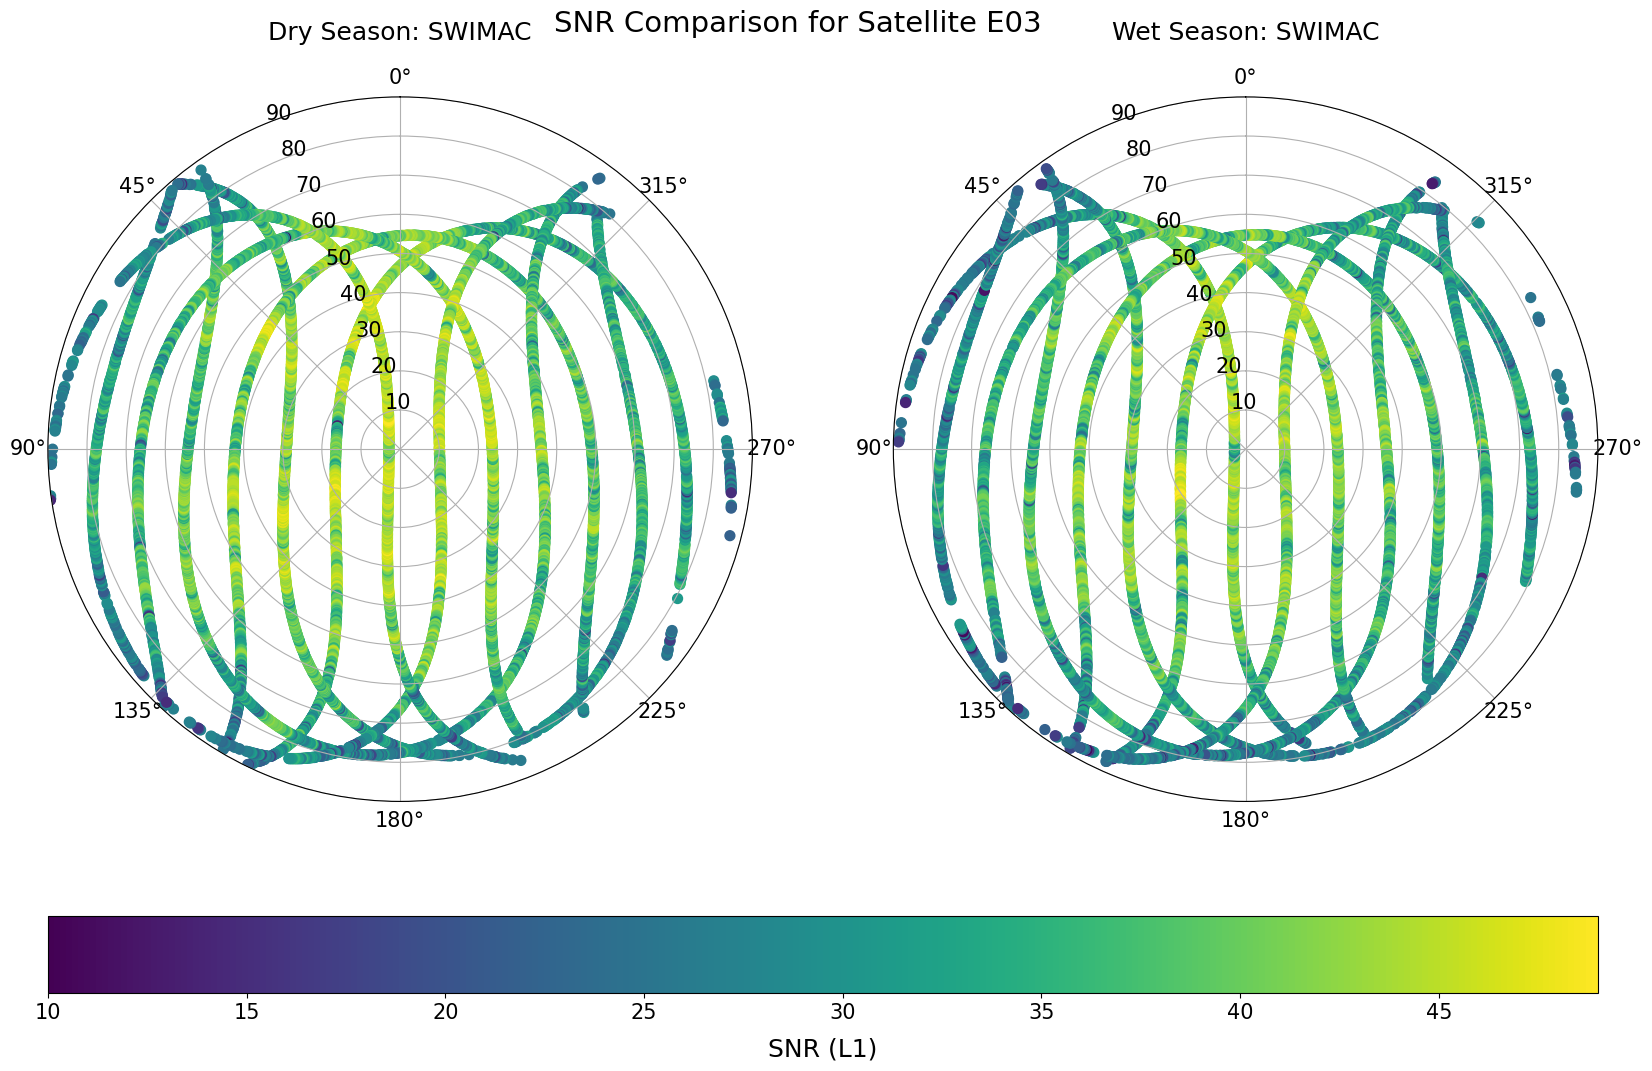

/var/folders/05/mycn0lrx46d_t3st_g0xv1lh0000gq/T/ipykernel_13545/1635700170.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


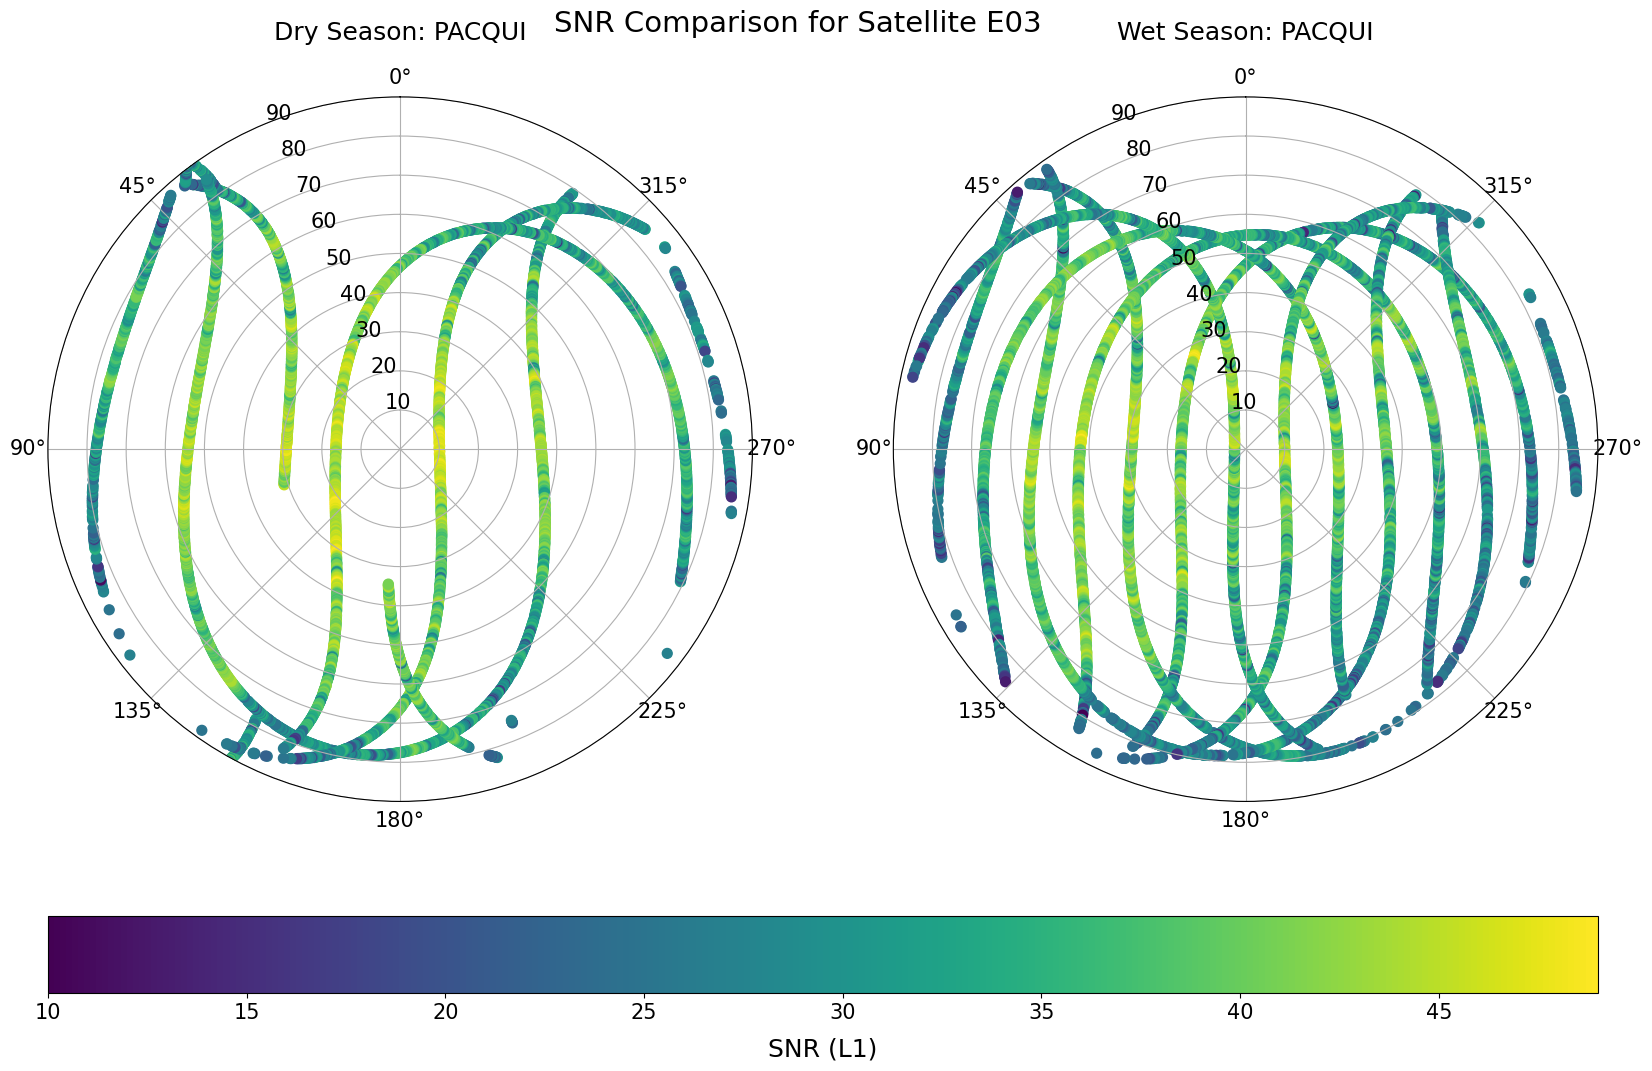

/var/folders/05/mycn0lrx46d_t3st_g0xv1lh0000gq/T/ipykernel_13545/1635700170.py:149: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [4]:
mySV = 'E03'
# Set font sizes (1.5x larger than default)
plt.rcParams.update({'font.size': 18})  # Base font size (default is 12)


# swimac SNR Comparison Plots
# initialize figure with two polar axes side by side
fig = plt.figure(figsize=(20,12))  # Increased height for colorbar space

# Create subplot grid for proper colorbar placement
gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.15], hspace=0.2)
ax1 = fig.add_subplot(gs[0, 0], projection='polar')
ax2 = fig.add_subplot(gs[0, 1], projection='polar')

# Get data for both seasons to determine common color scale
subdf_ds_swimac = df_DS_swimac.xs(mySV,level='SV')
subdf_ws_swimac = df_WS_swimac.xs(mySV,level='SV')
vmin = min(subdf_ds_swimac.S1X.min(), subdf_ws_swimac.S1X.min())
vmax = max(subdf_ds_swimac.S1X.max(), subdf_ws_swimac.S1X.max())

# Dry Season Plot (Left)
radius = 90-subdf_ds_swimac.Elevation
theta = np.deg2rad(subdf_ds_swimac.Azimuth)
hs1 = ax1.scatter(theta, radius, c=subdf_ds_swimac.S1X, vmin=vmin, vmax=vmax, s=50)  # Adjusted marker size
ax1.set_rlim([0,90])
ax1.set_theta_zero_location("N")
ax1.set_title("Dry Season: SWIMAC", pad=20, fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=15)

# Wet Season Plot (Right)
radius = 90-subdf_ws_swimac.Elevation
theta = np.deg2rad(subdf_ws_swimac.Azimuth)
hs2 = ax2.scatter(theta, radius, c=subdf_ws_swimac.S1X, vmin=vmin, vmax=vmax, s=50)  # Adjusted marker size
ax2.set_rlim([0,90])
ax2.set_theta_zero_location("N")
ax2.set_title("Wet Season: SWIMAC", pad=20, fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=15)

# Add a single colorbar in a new subplot below both plots
cax = fig.add_subplot(gs[1, :])
cax.set_visible(False)  # Hide the axes of the colorbar subplot
cbar = fig.colorbar(hs1, ax=cax, orientation='horizontal', fraction=1.0)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('SNR (L1)', size=18, labelpad=10)

# Add a main title for the entire figure
fig.suptitle(f'SNR Comparison for Satellite {mySV}', y=0.95, fontsize=21)

# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.9, bottom=0.1)

# Save the figure before displaying
plt.savefig('figures/SNR_comparison_E03_swimac.png', 
            dpi=300,  # High resolution
            bbox_inches='tight',  # Removes extra whitespace
            pad_inches=0.1,  # Adds a small padding around the plot
            facecolor='white')  # Ensure white background

# Display the figure in the notebook
plt.show()

# End of swimac SNR Comparison Plots
# pacqui SNR Comparison Plots
# initialize figure with two polar axes side by side
fig = plt.figure(figsize=(20,12))  # Increased height for colorbar space
# Create subplot grid for proper colorbar placement
gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.15], hspace=0.2)
ax1 = fig.add_subplot(gs[0, 0], projection='polar')
ax2 = fig.add_subplot(gs[0, 1], projection='polar')         
# Get data for both seasons to determine common color scale
subdf_ds_pacqui = df_DS_pacqui.xs(mySV,level='SV')
subdf_ws_pacqui = df_WS_pacqui.xs(mySV,level='SV')
vmin = min(subdf_ds_pacqui.S1X.min(), subdf_ws_pacqui.S1X.min())
vmax = max(subdf_ds_pacqui.S1X.max(), subdf_ws_pacqui.S1X.max())
# Dry Season Plot (Left)
radius = 90-subdf_ds_pacqui.Elevation
theta = np.deg2rad(subdf_ds_pacqui.Azimuth)
hs1 = ax1.scatter(theta, radius, c=subdf_ds_pacqui.S1X, vmin=vmin, vmax=vmax, s=50)  # Adjusted marker size
ax1.set_rlim([0,90])
ax1.set_theta_zero_location("N")
ax1.set_title("Dry Season: PACQUI", pad=20, fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=15)
# Wet Season Plot (Right)
radius = 90-subdf_ws_pacqui.Elevation
theta = np.deg2rad(subdf_ws_pacqui.Azimuth)
hs2 = ax2.scatter(theta, radius, c=subdf_ws_pacqui.S1X, vmin=vmin, vmax=vmax, s=50)  # Adjusted marker size
ax2.set_rlim([0,90])
ax2.set_theta_zero_location("N")
ax2.set_title("Wet Season: PACQUI", pad=20, fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=15)
# Add a single colorbar in a new subplot below both plots
cax = fig.add_subplot(gs[1, :])
cax.set_visible(False)  # Hide the axes of the colorbar subplot
cbar = fig.colorbar(hs1, ax=cax, orientation='horizontal', fraction=1.0)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('SNR (L1)', size=18, labelpad=10)
# Add a main title for the entire figure
fig.suptitle(f'SNR Comparison for Satellite {mySV}', y=0.95, fontsize=21)
# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.9, bottom=0.1)
# Save the figure before displaying
plt.savefig('figures/SNR_comparison_E03_pacqui.png', 
            dpi=300,  # High resolution
            bbox_inches='tight',  # Removes extra whitespace
            pad_inches=0.1,  # Adds a small padding around the plot
            facecolor='white')  # Ensure white background
# Display the figure in the notebook
plt.show()
# End of pacqui SNR Comparison Plots
# manchi SNR Comparison Plots
# initialize figure with two polar axes side by side
fig = plt.figure(figsize=(20,12))  # Increased height for colorbar space
# Create subplot grid for proper colorbar placement
gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.15], hspace=0.2)
ax1 = fig.add_subplot(gs[0, 0], projection='polar')
ax2 = fig.add_subplot(gs[0, 1], projection='polar')         
# Get data for both seasons to determine common color scale
subdf_ds_manchi = df_DS_manchi.xs(mySV,level='SV')
subdf_ws_manchi = df_WS_manchi.xs(mySV,level='SV')
vmin = min(subdf_ds_manchi.S1X.min(), subdf_ws_manchi.S1X.min())
vmax = max(subdf_ds_manchi.S1X.max(), subdf_ws_manchi.S1X.max())
# Dry Season Plot (Left)
radius = 90-subdf_ds_manchi.Elevation
theta = np.deg2rad(subdf_ds_manchi.Azimuth)
hs1 = ax1.scatter(theta, radius, c=subdf_ds_manchi.S1X, vmin=vmin, vmax=vmax, s=50)  # Adjusted marker size
ax1.set_rlim([0,90])
ax1.set_theta_zero_location("N")
ax1.set_title("Dry Season: MANCHI", pad=20, fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=15)
# Wet Season Plot (Right)
radius = 90-subdf_ws_manchi.Elevation
theta = np.deg2rad(subdf_ws_manchi.Azimuth)
hs2 = ax2.scatter(theta, radius, c=subdf_ws_manchi.S1X, vmin=vmin, vmax=vmax, s=50)  # Adjusted marker size
ax2.set_rlim([0,90])
ax2.set_theta_zero_location("N")
ax2.set_title("Wet Season: MANCHI", pad=20, fontsize=18)
ax2.tick_params(axis='both', which='major', labelsize=15)
# Add a single colorbar in a new subplot below both plots
cax = fig.add_subplot(gs[1, :])
cax.set_visible(False)  # Hide the axes of the colorbar subplot
cbar = fig.colorbar(hs1, ax=cax, orientation='horizontal', fraction=1.0)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('SNR (L1)', size=18, labelpad=10)
# Add a main title for the entire figure
fig.suptitle(f'SNR Comparison for Satellite {mySV}', y=0.95, fontsize=21)
# Adjust layout
plt.tight_layout()
fig.subplots_adjust(top=0.9, bottom=0.1)
# Save the figure before displaying
plt.savefig('figures/SNR_comparison_E03_manchi.png', 
            dpi=300,  # High resolution
            bbox_inches='tight',  # Removes extra whitespace
            pad_inches=0.1,  # Adds a small padding around the plot
            facecolor='white')  # Ensure white background
# Display the figure in the notebook
plt.show()
# End of manchi SNR Comparison Plots    

## Plot all satellites

Visualize all possible satellites for dry and wet season


--- Normalized plots for SWIMAC ---
Using z-score normalization (vmin=-4.44, vmax=4.44) for swimac


/var/folders/05/mycn0lrx46d_t3st_g0xv1lh0000gq/T/ipykernel_13545/3170203798.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Saved: figures/SNR_comparison_all_satellites_swimac_zscore.png



--- Normalized plots for PACQUI ---
Using z-score normalization (vmin=-4.40, vmax=4.40) for pacqui
Saved: figures/SNR_comparison_all_satellites_pacqui_zscore.png
Saved: figures/SNR_comparison_all_satellites_pacqui_zscore.png


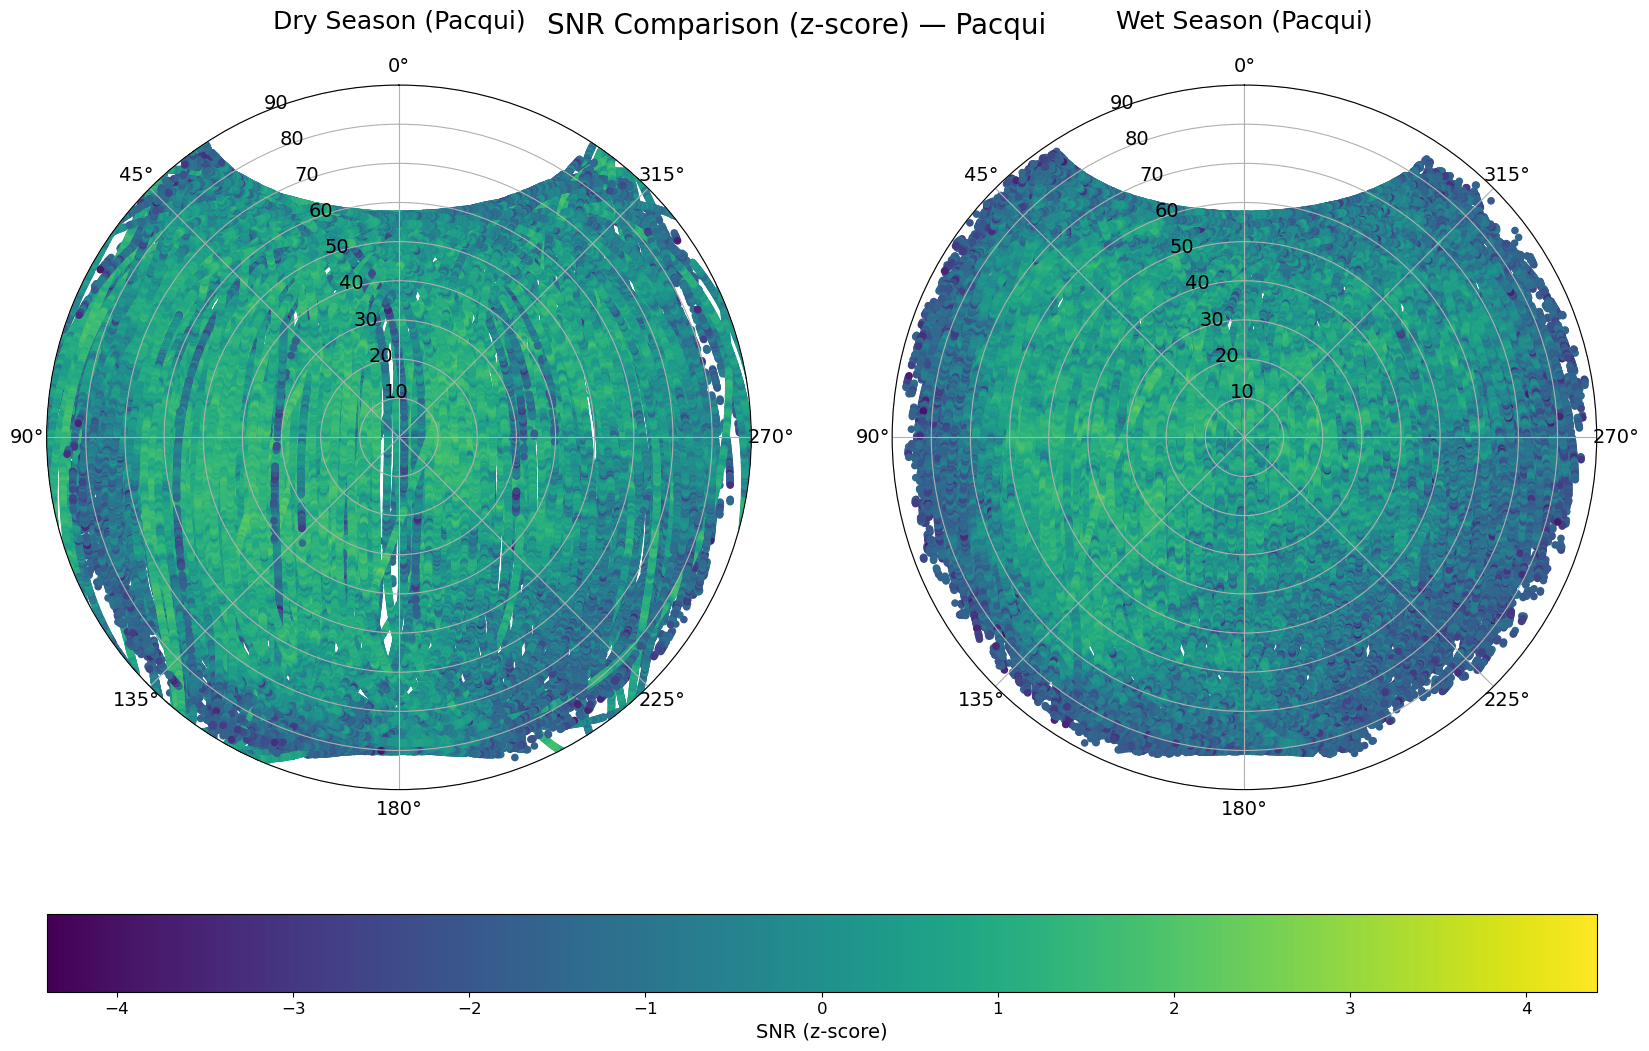


--- Normalized plots for MANCHI ---
Using z-score normalization (vmin=-3.98, vmax=3.98) for manchi
Saved: figures/SNR_comparison_all_satellites_manchi_zscore.png
Saved: figures/SNR_comparison_all_satellites_manchi_zscore.png


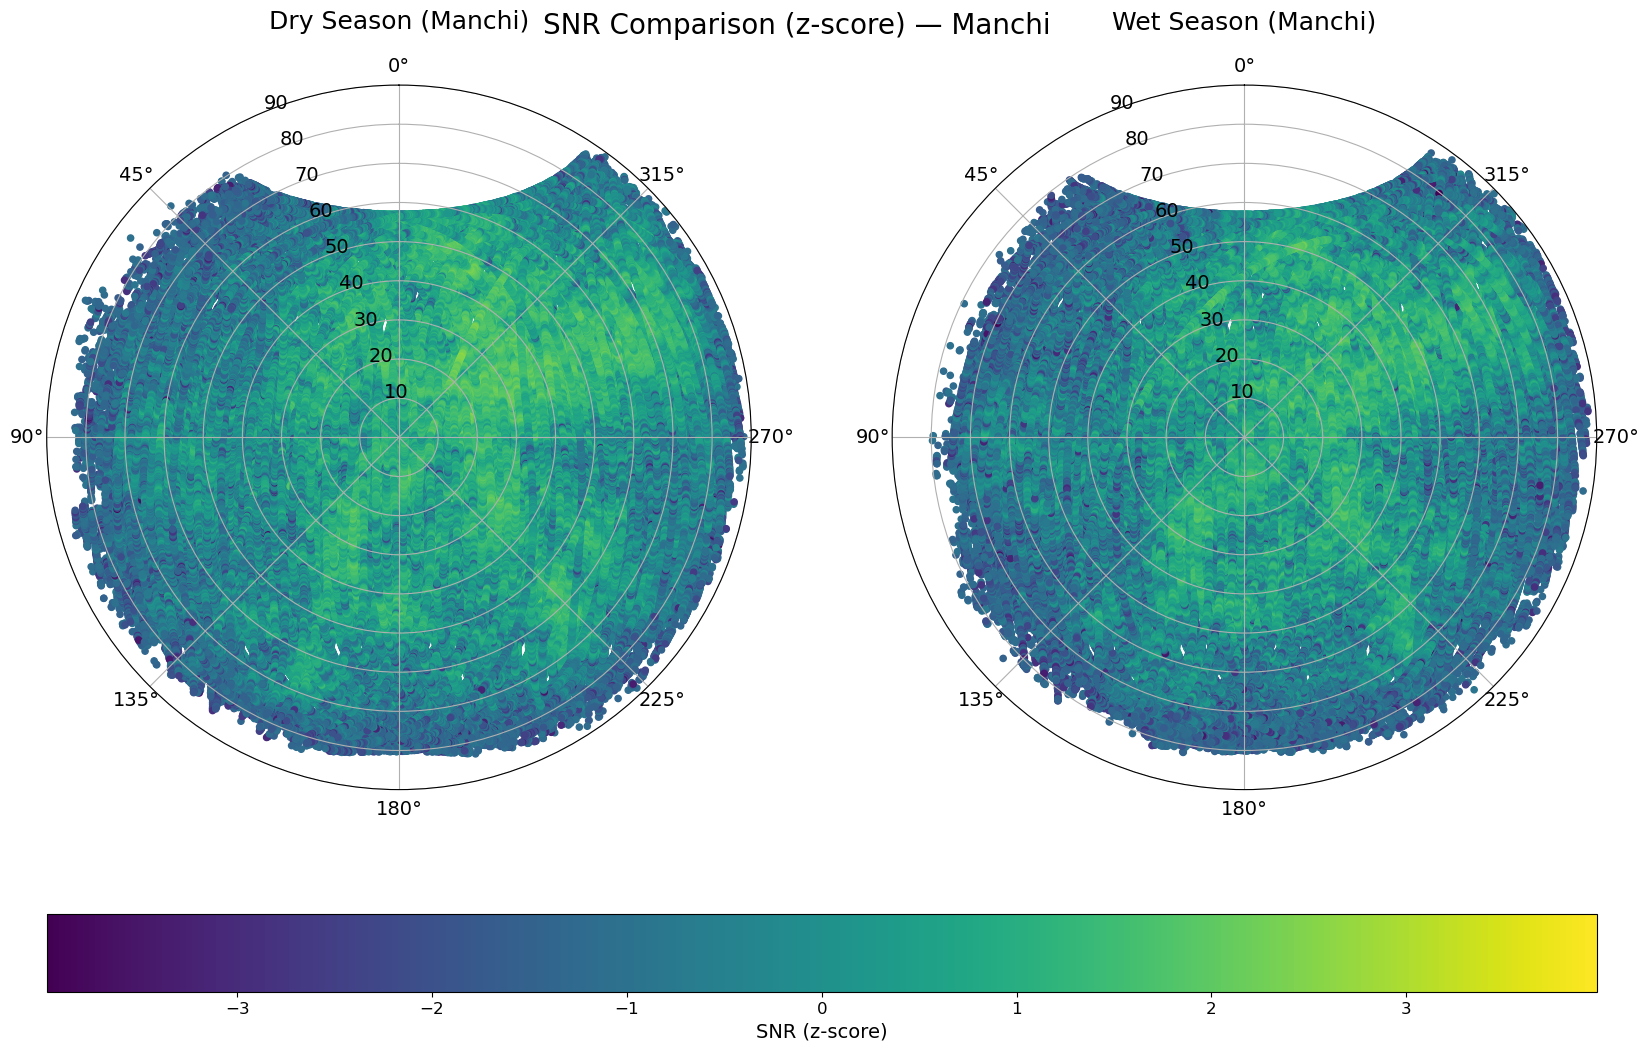

In [5]:
# Per-species z-score normalized polar comparisons (histograms removed from this cell).
import os
os.makedirs('figures', exist_ok=True)

plt.rcParams.update({'font.size': 18})

species_pairs = [
    ("swimac", df_DS_swimac, df_WS_swimac),
    ("pacqui", df_DS_pacqui, df_WS_pacqui),
    ("manchi", df_DS_manchi, df_WS_manchi),
]

for name, df_ds, df_ws in species_pairs:
    print(f"\n--- Normalized plots for {name.upper()} ---")

    if df_ds.empty:
        print(f"Dry season dataframe is EMPTY for {name}")
        continue
    if df_ws.empty:
        print(f"Wet season dataframe is EMPTY for {name}")
        continue

    # Combine values for normalization
    combined_vals = pd.concat([df_ds.S1X, df_ws.S1X]).dropna()
    if combined_vals.empty:
        print(f"No SNR values for {name}; skipping")
        continue

    mean_combined = combined_vals.mean()
    std_combined = combined_vals.std()
    if std_combined == 0 or np.isnan(std_combined):
        std_combined = 1.0

    # z-score normalization
    z_ds = (df_ds.S1X - mean_combined) / std_combined
    z_ws = (df_ws.S1X - mean_combined) / std_combined

    # symmetric color range around zero for diverging cmap
    max_abs = max(np.nanmax(np.abs(z_ds.values)) if len(z_ds.dropna())>0 else 0,
                  np.nanmax(np.abs(z_ws.values)) if len(z_ws.dropna())>0 else 0,
                  1e-6)
    vmin, vmax = -max_abs, max_abs
    print(f"Using z-score normalization (vmin={vmin:.2f}, vmax={vmax:.2f}) for {name}")

    # Build figure: two polar plots side-by-side + horizontal colorbar
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 0.12], hspace=0.2)
    ax1 = fig.add_subplot(gs[0, 0], projection='polar')
    ax2 = fig.add_subplot(gs[0, 1], projection='polar')

    # Dry
    radius = 90 - df_ds.Elevation
    theta = np.deg2rad(df_ds.Azimuth % 360)
    sc1 = ax1.scatter(theta, radius, c=z_ds, s=20, cmap='viridis', vmin=vmin, vmax=vmax)
    ax1.set_rlim([0, 90])
    ax1.set_theta_zero_location('N')
    ax1.set_title(f"Dry Season ({name.title()})", pad=20, fontsize=18)
    ax1.tick_params(axis='both', which='major', labelsize=14)

    # Wet
    radius = 90 - df_ws.Elevation
    theta = np.deg2rad(df_ws.Azimuth % 360)
    sc2 = ax2.scatter(theta, radius, c=z_ws, s=20, cmap='viridis', vmin=vmin, vmax=vmax)
    ax2.set_rlim([0, 90])
    ax2.set_theta_zero_location('N')
    ax2.set_title(f"Wet Season ({name.title()})", pad=20, fontsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=14)

    # Colorbar subplot
    cax = fig.add_subplot(gs[1, :])
    cax.set_visible(False)
    cbar = fig.colorbar(sc1, ax=cax, orientation='horizontal', fraction=1.0)
    cbar.set_label('SNR (z-score)', size=14)
    cbar.ax.tick_params(labelsize=12)

    fig.suptitle(f'SNR Comparison (z-score) — {name.title()}', y=0.95, fontsize=20)
    plt.tight_layout()
    fig.subplots_adjust(top=0.92, bottom=0.12)

    outpath = f'figures/SNR_comparison_all_satellites_{name}_zscore.png'
    plt.savefig(outpath, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"Saved: {outpath}")
    plt.show()

## Analyze differences

Perform statistics to know if SNR is different between wet and dry season


=== Species: SWIMAC ===
  Welch t: t=93.952, p=0; mean_diff=1.643 (95% CI [1.609, 1.677]); d=0.255

=== Species: PACQUI ===
  Welch t: t=142.232, p=0; mean_diff=2.476 (95% CI [2.442, 2.510]); d=0.389

=== Species: PACQUI ===
  Welch t: t=142.232, p=0; mean_diff=2.476 (95% CI [2.442, 2.510]); d=0.389

=== Species: MANCHI ===
  Welch t: t=80.184, p=0; mean_diff=1.500 (95% CI [1.464, 1.537]); d=0.233

=== Species: MANCHI ===
  Welch t: t=80.184, p=0; mean_diff=1.500 (95% CI [1.464, 1.537]); d=0.233

Global color scale max abs diff: 11.40 SNR units

Global color scale max abs diff: 11.40 SNR units
Saved combined analysis figure: figures/SNR_analysis_combined_ttest.png
Saved combined analysis figure: figures/SNR_analysis_combined_ttest.png


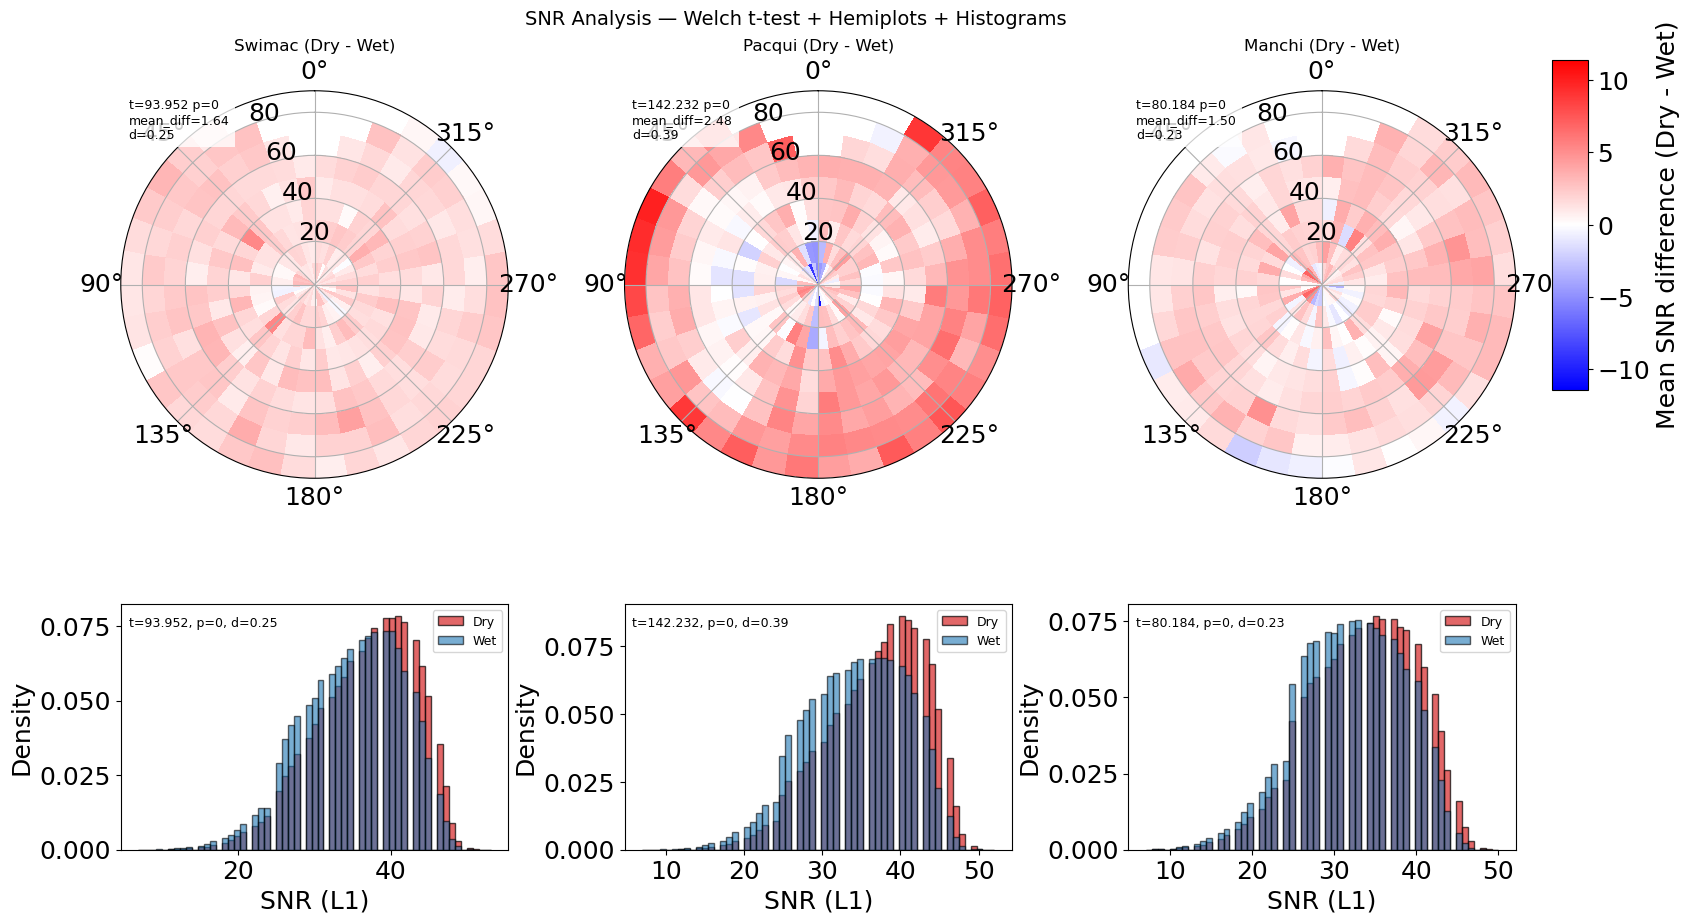


Welch t-test summary:
  swimac: t=93.9519, p=0, mean_diff=1.6430, 95%CI=[1.6087, 1.6773], d=0.255, n_dry=276789, n_wet=267062
  pacqui: t=142.2325, p=0, mean_diff=2.4760, 95%CI=[2.4419, 2.5101], d=0.389, n_dry=276689, n_wet=260202
  manchi: t=80.1842, p=0, mean_diff=1.5002, 95%CI=[1.4636, 1.5369], d=0.233, n_dry=246853, n_wet=226788


In [6]:
import os
from scipy.stats import ttest_ind, t
# Ensure figures directory exists
os.makedirs('figures', exist_ok=True)

# Parameters for az/el binning
n_az_bins = 36  # 10° bins
n_el_bins = 9   # 10° bins (0-90)
az_edges = np.linspace(0, 360, n_az_bins + 1)
el_edges = np.linspace(0, 90, n_el_bins + 1)

species_pairs = [
    ("swimac", df_DS_swimac, df_WS_swimac),
    ("pacqui", df_DS_pacqui, df_WS_pacqui),
    ("manchi", df_DS_manchi, df_WS_manchi),
]

# Utility to compute binned mean S1X on (el_bins-1, az_bins-1)
def compute_binned_mean(df, az_edges, el_edges):
    az = (df.Azimuth % 360).values
    el = df.Elevation.values
    vals = df.S1X.values
    out = np.full((len(el_edges)-1, len(az_edges)-1), np.nan)
    for i in range(len(el_edges)-1):
        el_mask = (el >= el_edges[i]) & (el < el_edges[i+1])
        for j in range(len(az_edges)-1):
            az_mask = (az >= az_edges[j]) & (az < az_edges[j+1])
            mask = el_mask & az_mask & ~np.isnan(vals)
            if np.any(mask):
                out[i, j] = np.nanmean(vals[mask])
    return out

# Containers for results
diff_matrices = {}
ttest_results = {}
all_abs_vals = []

for name, df_ds, df_ws in species_pairs:
    print(f"\n=== Species: {name.upper()} ===")

    ds_vals = df_ds.S1X.dropna().values
    ws_vals = df_ws.S1X.dropna().values

    if len(ds_vals) == 0 or len(ws_vals) == 0:
        print(f"  Skipping {name} because one of the samples is empty (dry:{len(ds_vals)}, wet:{len(ws_vals)})")
        continue

    # Welch's t-test (assume normality but unequal variances)
    t_stat, p_val = ttest_ind(ds_vals, ws_vals, equal_var=False, nan_policy='omit')

    # Means and standard deviations
    mean_ds = np.nanmean(ds_vals)
    mean_ws = np.nanmean(ws_vals)
    sd_ds = np.nanstd(ds_vals, ddof=1)
    sd_ws = np.nanstd(ws_vals, ddof=1)
    n_ds = len(ds_vals)
    n_ws = len(ws_vals)
    mean_diff = mean_ds - mean_ws

    # Welch-Satterthwaite degrees of freedom for CI
    se = np.sqrt(sd_ds**2 / n_ds + sd_ws**2 / n_ws)
    if se == 0 or np.isnan(se):
        ci_low, ci_high = (mean_diff, mean_diff)
    else:
        df_welch = (sd_ds**2 / n_ds + sd_ws**2 / n_ws)**2 / ((sd_ds**4) / (n_ds**2 * (n_ds - 1)) + (sd_ws**4) / (n_ws**2 * (n_ws - 1)))
        # two-sided 95% CI using t distribution
        alpha = 0.05
        t_crit = t.ppf(1 - alpha/2, df_welch)
        ci_low = mean_diff - t_crit * se
        ci_high = mean_diff + t_crit * se

    # Cohen's d (use pooled sd approximation appropriate for reporting effect size for unequal n)
    # Using sqrt((sd1^2 + sd2^2)/2) as a conservative pooled estimate
    pooled_sd = np.sqrt((sd_ds**2 + sd_ws**2) / 2.0)
    if pooled_sd == 0 or np.isnan(pooled_sd):
        cohens_d = 0.0
    else:
        cohens_d = mean_diff / pooled_sd

    ttest_results[name] = dict(t_stat=t_stat, p_val=p_val, mean_diff=mean_diff, ci=(ci_low, ci_high), cohens_d=cohens_d, n_ds=n_ds, n_ws=n_ws)
    print(f"  Welch t: t={t_stat:.3f}, p={p_val:.3g}; mean_diff={mean_diff:.3f} (95% CI [{ci_low:.3f}, {ci_high:.3f}]); d={cohens_d:.3f}")

    # Compute binned mean SNR for dry and wet
    binned_ds = compute_binned_mean(df_ds, az_edges, el_edges)
    binned_ws = compute_binned_mean(df_ws, az_edges, el_edges)

    # Difference: dry - wet
    diff = binned_ds - binned_ws
    diff_matrices[name] = diff

    # collect absolute values for global color scaling
    if np.any(~np.isnan(diff)):
        all_abs_vals.append(np.nanmax(np.abs(diff)))

# Determine global symmetric color limit (in SNR units)
if len(all_abs_vals) == 0:
    global_vmax = 1.0
else:
    global_vmax = max(all_abs_vals) * 1.05
print(f"\nGlobal color scale max abs diff: {global_vmax:.2f} SNR units")

# Build a combined figure: top row = hemiplots, bottom row = histograms (dry vs wet)
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(2, 3, height_ratios=[1, 0.6], hspace=0.35, wspace=0.3)

# Top row: hemiplots
for idx, (name, _, _) in enumerate(species_pairs):
    ax = fig.add_subplot(gs[0, idx], projection='polar')
    if name not in diff_matrices:
        ax.text(0.5, 0.5, f"No data for {name}", ha='center', va='center')
        ax.axis('off')
        continue
    diff = diff_matrices[name]
    theta_edges = np.deg2rad(az_edges)
    r_edges = 90.0 - el_edges
    Theta, R = np.meshgrid(theta_edges, r_edges)
    pcm = ax.pcolormesh(Theta, R, diff, cmap='bwr', vmin=-global_vmax, vmax=global_vmax, shading='auto')
    ax.set_rlim([0, 90])
    ax.set_theta_zero_location('N')
    ax.set_title(f"{name.title()} (Dry - Wet)", fontsize=12)
    # Annotate t-test results
    if name in ttest_results:
        r = ttest_results[name]
        txt = f"t={r['t_stat']:.3f} p={r['p_val']:.3g}\nmean_diff={r['mean_diff']:.2f}\nd={r['cohens_d']:.2f}"
        ax.text(0.02, 0.98, txt, transform=ax.transAxes, fontsize=9, va='top', ha='left', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

# shared colorbar for hemiplots
cbar_ax = fig.add_axes([0.92, 0.57, 0.02, 0.33])
fig.colorbar(pcm, cax=cbar_ax).set_label('Mean SNR difference (Dry - Wet)')

# Bottom row: histograms (one per species)
for idx, (name, df_ds, df_ws) in enumerate(species_pairs):
    axh = fig.add_subplot(gs[1, idx])
    ds_vals = df_ds.S1X.dropna().values
    ws_vals = df_ws.S1X.dropna().values
    if len(ds_vals) == 0 or len(ws_vals) == 0:
        axh.text(0.5, 0.5, 'No data', ha='center', va='center')
        axh.axis('off')
        continue
    bins = np.linspace(min(ds_vals.min(), ws_vals.min()), max(ds_vals.max(), ws_vals.max()), 60)
    axh.hist(ds_vals, bins=bins, density=True, alpha=0.7, color='tab:red', edgecolor='black', label='Dry')
    axh.hist(ws_vals, bins=bins, density=True, alpha=0.6, color='tab:blue', edgecolor='black', label='Wet')
    axh.set_xlabel('SNR (L1)')
    axh.set_ylabel('Density')
    axh.legend(fontsize=9)
    # annotate t/p/d for this species if available
    if name in ttest_results:
        r = ttest_results[name]
        ann = f"t={r['t_stat']:.3f}, p={r['p_val']:.3g}, d={r['cohens_d']:.2f}"
        axh.text(0.02, 0.95, ann, transform=axh.transAxes, fontsize=9, va='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

fig.suptitle('SNR Analysis — Welch t-test + Hemiplots + Histograms', fontsize=14, y=0.95)
out_combined = 'figures/SNR_analysis_combined_ttest.png'
plt.savefig(out_combined, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved combined analysis figure: {out_combined}")
plt.show()

# Print t-test summary table
print('\nWelch t-test summary:')
for name, r in ttest_results.items():
    print(f"  {name}: t={r['t_stat']:.4f}, p={r['p_val']:.4g}, mean_diff={r['mean_diff']:.4f}, 95%CI=[{r['ci'][0]:.4f}, {r['ci'][1]:.4f}], d={r['cohens_d']:.3f}, n_dry={r['n_ds']}, n_wet={r['n_ws']}")